### 基于scikit-learn的机器学习模型训练
1. 数据加载
2. 数据预处理
3. 数据特征分析
4. 模型训练
5. 模型评估

In [ ]:
# 安装相关包
# ! pip install scikit-learn pandas matplotlib numpy seaborn xgboost

In [ ]:
# 回归数据的模型训练——波士顿房价
import pandas as pd
#df = pd.read_csv("boston_house_prices.csv")
df = pd.read_csv("boston_house_prices_missing.csv")
print(df.shape)
df.head(5) # 查看前5行数据


(506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0      NaN  18.0   2.31   0.0  0.538    NaN  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469    NaN  78.9  4.9671  2.0  242.0   
2      NaN   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   NaN  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3     NaN   4.98  24.0  
1     17.8     NaN    NaN  21.6  
2     17.8  392.83    NaN  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90    NaN   NaN

## 数据变量介绍
每条记录都记录了波士顿的一个郊区或城镇

| 变量名   | 变量描述                           | 值类型            |
|----------|------------------------------------|-------------------|
| CRIM     | 犯罪率 (Ratio)                     | 数值-连续-比率    |
| ZN       | 住宅占地比 (Ratio)                 | 数值-连续-比率    |
| INDUS    | 非零售商业用地面积比例 (Ratio)           | 数值-连续-比率    |
| CHAS     | 是否临近查尔斯河 (Boolean)                 | 分类              |
| NOX      | 一氧化碳浓度 (Ratio, per 10 million) | 数值-连续-比率    |
| RM       | 每个住宅平均房间数 (Number)        | 数值-离散-数量    |
| AGE      | 建于1940年前的房屋占比 (Ratio)     | 数值-连续-比率    |
| DIS      | 到波士顿五个就业中心的加权距离 (Number)  | 数值-离散-数量    |
| RAD      | 公路通达性指数 (Index)             | 数值-离散-指数    |
| TAX      | 税率 (Ratio, per $10,000)          | 数值-连续-比率    |
| PTRATIO  | 师生比 (Ratio)                     | 数值-连续-比率    |
| B        | 黑人指数 (Index) $B=1000(B_k-0.63)^2$ | 数值-连续-指数    |
| LSTAT    | 低收入人口比率 (Ratio)             | 数值-连续-比率    |
| MEDV     | 房价中位数 (Number)            | 数值-离散-数量    |


In [5]:
## 模型训练前需要对数据做预处理
## 包括缺失值处理、特征选择等、特征缩放

In [6]:
# 缺少值处理
df.isnull().sum() ## 统计缺失值


CRIM       50
ZN         50
INDUS      50
CHAS       50
NOX        50
RM         50
AGE        50
DIS        50
RAD        50
TAX        50
PTRATIO    50
B          50
LSTAT      50
MEDV       50
dtype: int64

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     456 non-null    float64
 1   ZN       456 non-null    float64
 2   INDUS    456 non-null    float64
 3   CHAS     456 non-null    float64
 4   NOX      456 non-null    float64
 5   RM       456 non-null    float64
 6   AGE      456 non-null    float64
 7   DIS      456 non-null    float64
 8   RAD      456 non-null    float64
 9   TAX      456 non-null    float64
 10  PTRATIO  456 non-null    float64
 11  B        456 non-null    float64
 12  LSTAT    456 non-null    float64
 13  MEDV     456 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  456.000000  456.000000  456.000000  456.000000  456.000000  456.000000   
mean     3.668933   11.634868   11.380570    0.070175    0.555127    6.289831   
std      8.731071   23.734982    6.920824    0.255723    0.116456    0.717111   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.190000    0.000000    0.449000    5.883000   
50%      0.266505    0.000000    9.900000    0.000000    0.538000    6.205000   
75%      3.594927   12.500000   18.100000    0.000000    0.624000    6.630250   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  456.000000  456.000000  456.000000  456.000000  456.000000  456.000000   
mean    68.932675    3.758560    9.385965  406.940789   18.460307  357.399759   
std     28.080011    2.090851    8.616120  167.696019    2.150467   90.498063   
min      2.900000    1.129600    1.000000  187.000000   12.600000    2.520000   
25%     45.075000    2.070275    4.000000  279.750000   17.375000  375.997500   
50%     77.950000    3.122200    5.000000  330.000000   19.050000  391.260000   
75%     94.150000    5.117025   24.000000  666.000000   20.200000  396.157500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  456.000000  456.000000  
mean    12.880241   22.589035  
std      7.222357    9.198493  
min      1.730000    5.000000  
25%      7.165000   16.950000  
50%     11.675000   21.300000  
75%     17.152500   25.125000  
max     37.970000   50.000000

缺失值的填充方法，例如插值法、前后值填充法、预测填充法、随机填充法等，不同的场合下，选择不同的填充方法。
| **填充方法**      | **适用场合**                                                                                           | **优点**                                                                                     | **缺点**                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **删除法**        | - 缺失值比例较小，并且数据量充足<br>- 缺失值分布随机且不重要                                            | 简单直接，操作方便                                                                          | 会导致数据量减少，可能丢失有用信息                                                          |
| **固定值填充**    | - 缺失值较少<br>- 数值型数据适合用均值/中位数填充<br>- 分类数据适合用众数填充                            | 操作简单，适合小规模数据集                                                                  | 可能引入偏差（如均值填充会抹平波动性）                                                     |
| **插值法**        | - 连续型数据，如时间序列数据<br>- 缺失值具有一定的规律性                                                 | 保持数据的连续性和趋势                                                                      | 不适合离散数据或分类数据，可能导致过于理想化的填充                                         |
| **前后值填充**    | - 时间序列或排序数据<br>- 数据变化平稳                                                                   | 简单直接，适合小范围缺失值                                                                  | 无法处理大范围缺失值，可能引入错误的趋势                                                   |
| **分组填充**      | - 数据可以按某些特征分组<br>- 缺失值与分组特性相关                                                       | 考虑了分组特性，减少偏差                                                                    | 需要合理的分组依据，分组不当可能影响结果                                                   |
| **预测填充**      | - 缺失值较多且具有复杂模式<br>- 数据量较大，其他特征与缺失值强相关                                        | 利用数据的内在关系进行填充，效果较好                                                        | 计算成本较高，模型预测可能存在误差                                                         |
| **标记缺失值**    | - 缺失值本身可能传递有用信息                                                                            | 不直接填充缺失值，保留了缺失值的信息                                                        | 未解决缺失值本身问题，可能需要与其他方法结合使用                                           |
| **多重插补**      | - 统计分析或建模要求避免丢失信息<br>- 缺失值较多时                                                       | 保留数据的不确定性，适合高质量建模                                                          | 计算复杂，需要一定的统计知识                                                              |
| **随机填充**      | - 数据对随机性要求较高<br>- 用于生成随机性模拟数据                                                       | 可以保持数据随机性                                                                          | 可能无法反映真实情况                                                                       |
| **专家经验填充**  | - 数据背后有明确的业务规律或专家知识支撑                                                                | 结合业务知识，填充更具针对性                                                                | 需要依赖领域专家，主观性较强                                                              |


In [8]:
## 缺失值处理
# 1. 删除法
# 删除包含缺失值的行
df_dropped_rows = df.dropna()
print(df_dropped_rows.shape)
# 删除包含缺失值的列
df_dropped_cols = df.dropna(axis=1)
print(df_dropped_cols.shape)


(132, 14)
(506, 0)


In [9]:
# 2. 固定值填充、如 0、均值、中位数、众数等）填充缺失值
df_filled_0 = df.fillna(0) # 用 0 填充缺失值
df_filled_0
df_filled_mean = df.fillna(df.mean()) # 用每一列的平均值填充缺失值
df_filled_mean
df_filled_median = df.fillna(df.median()) # 用每一列的中位数填充缺失值
df_filled_median


CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0    0.266505  18.0   2.31   0.0  0.538  6.205  65.20  4.0900  1.0  296.0   
1    0.027310   0.0   7.07   0.0  0.469  6.205  78.90  4.9671  2.0  242.0   
2    0.266505   0.0   7.07   0.0  0.469  7.185  61.10  4.9671  2.0  242.0   
3    0.032370   0.0   2.18   0.0  0.458  6.998  45.80  6.0622  3.0  222.0   
4    0.069050   0.0   2.18   0.0  0.458  7.147  77.95  6.0622  3.0  222.0   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
501  0.266505   0.0   9.90   0.0  0.538  6.593  69.10  2.4786  1.0  273.0   
502  0.045270   0.0  11.93   0.0  0.573  6.120  76.70  2.2875  1.0  330.0   
503  0.060760   0.0  11.93   0.0  0.573  6.976  91.00  2.1675  1.0  273.0   
504  0.109590   0.0  11.93   0.0  0.573  6.794  89.30  2.3889  1.0  273.0   
505  0.047410   0.0  11.93   0.0  0.573  6.030  80.80  2.5050  5.0  330.0   

     PTRATIO       B   LSTAT  MEDV  
0       15.3  391.26   4.980  24.0  
1       17.8  391.26  11.675  21.6  
2       17.8  392.83  11.675  34.7  
3       18.7  394.63   2.940  33.4  
4       18.7  396.90  11.675  21.3  
..       ...     ...     ...   ...  
501     21.0  391.99   9.670  22.4  
502     21.0  391.26   9.080  20.6  
503     21.0  396.90   5.640  23.9  
504     21.0  393.45   6.480  21.3  
505     21.0  396.90   7.880  11.9  

[506 rows x 14 columns]

In [10]:
##在模型训练前还需要对数据进行分析，选择合适的特征用于训练

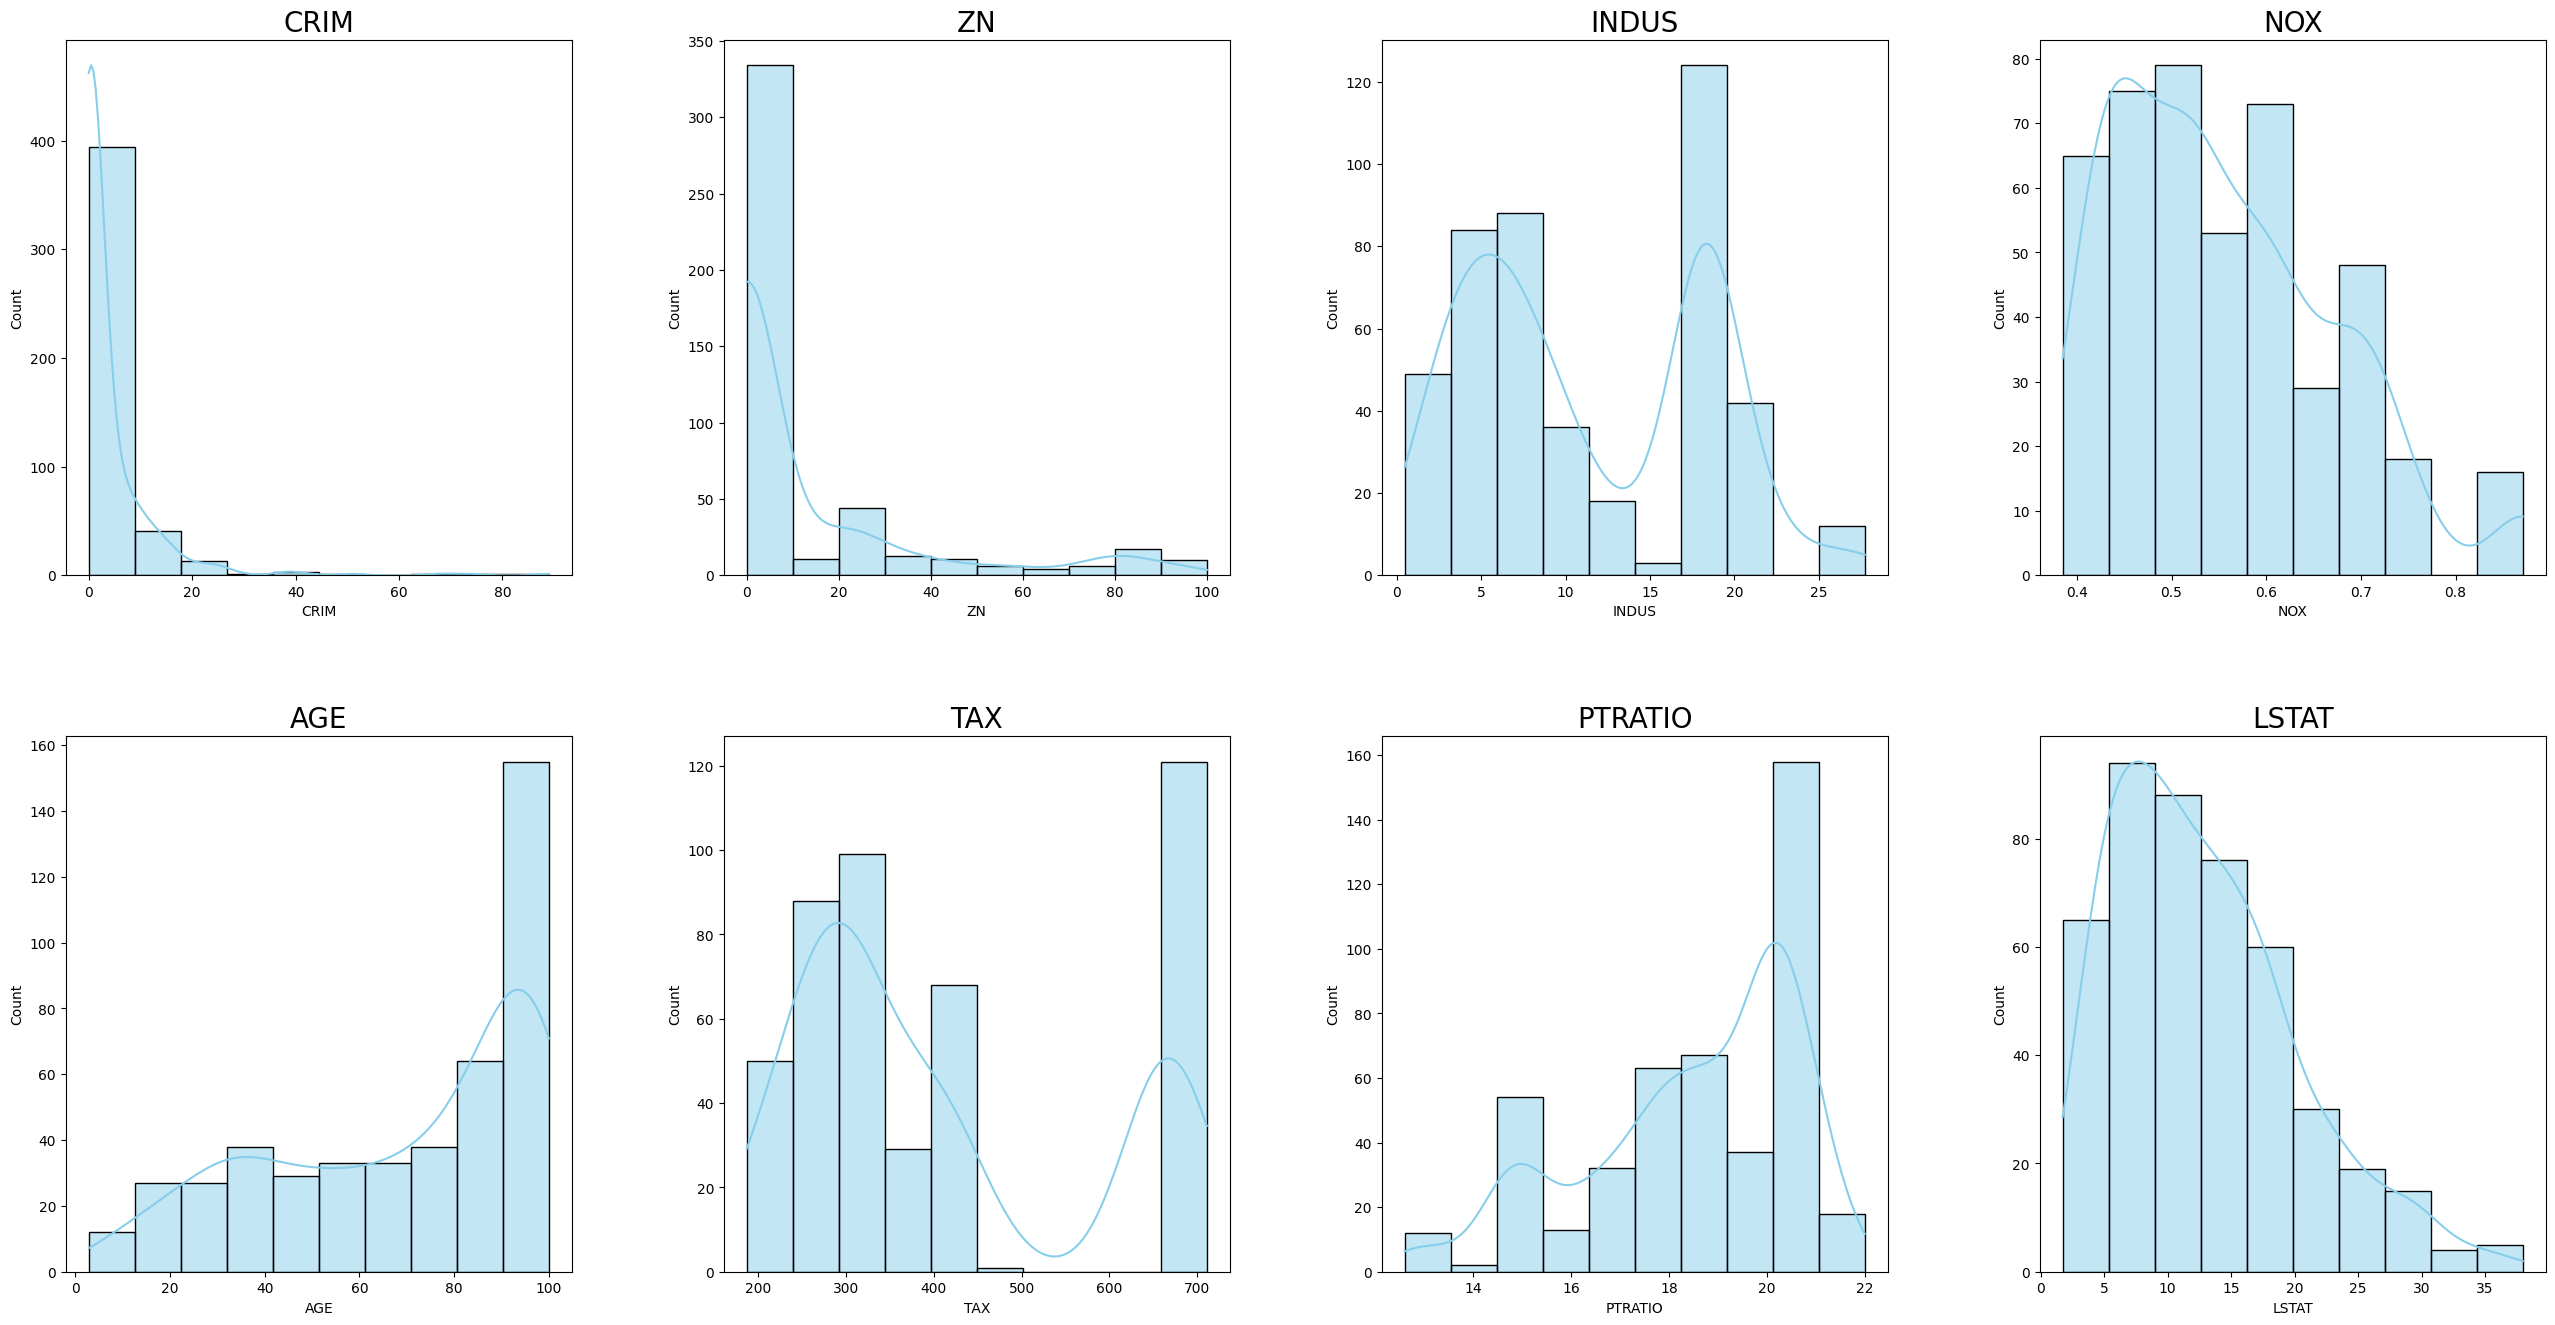

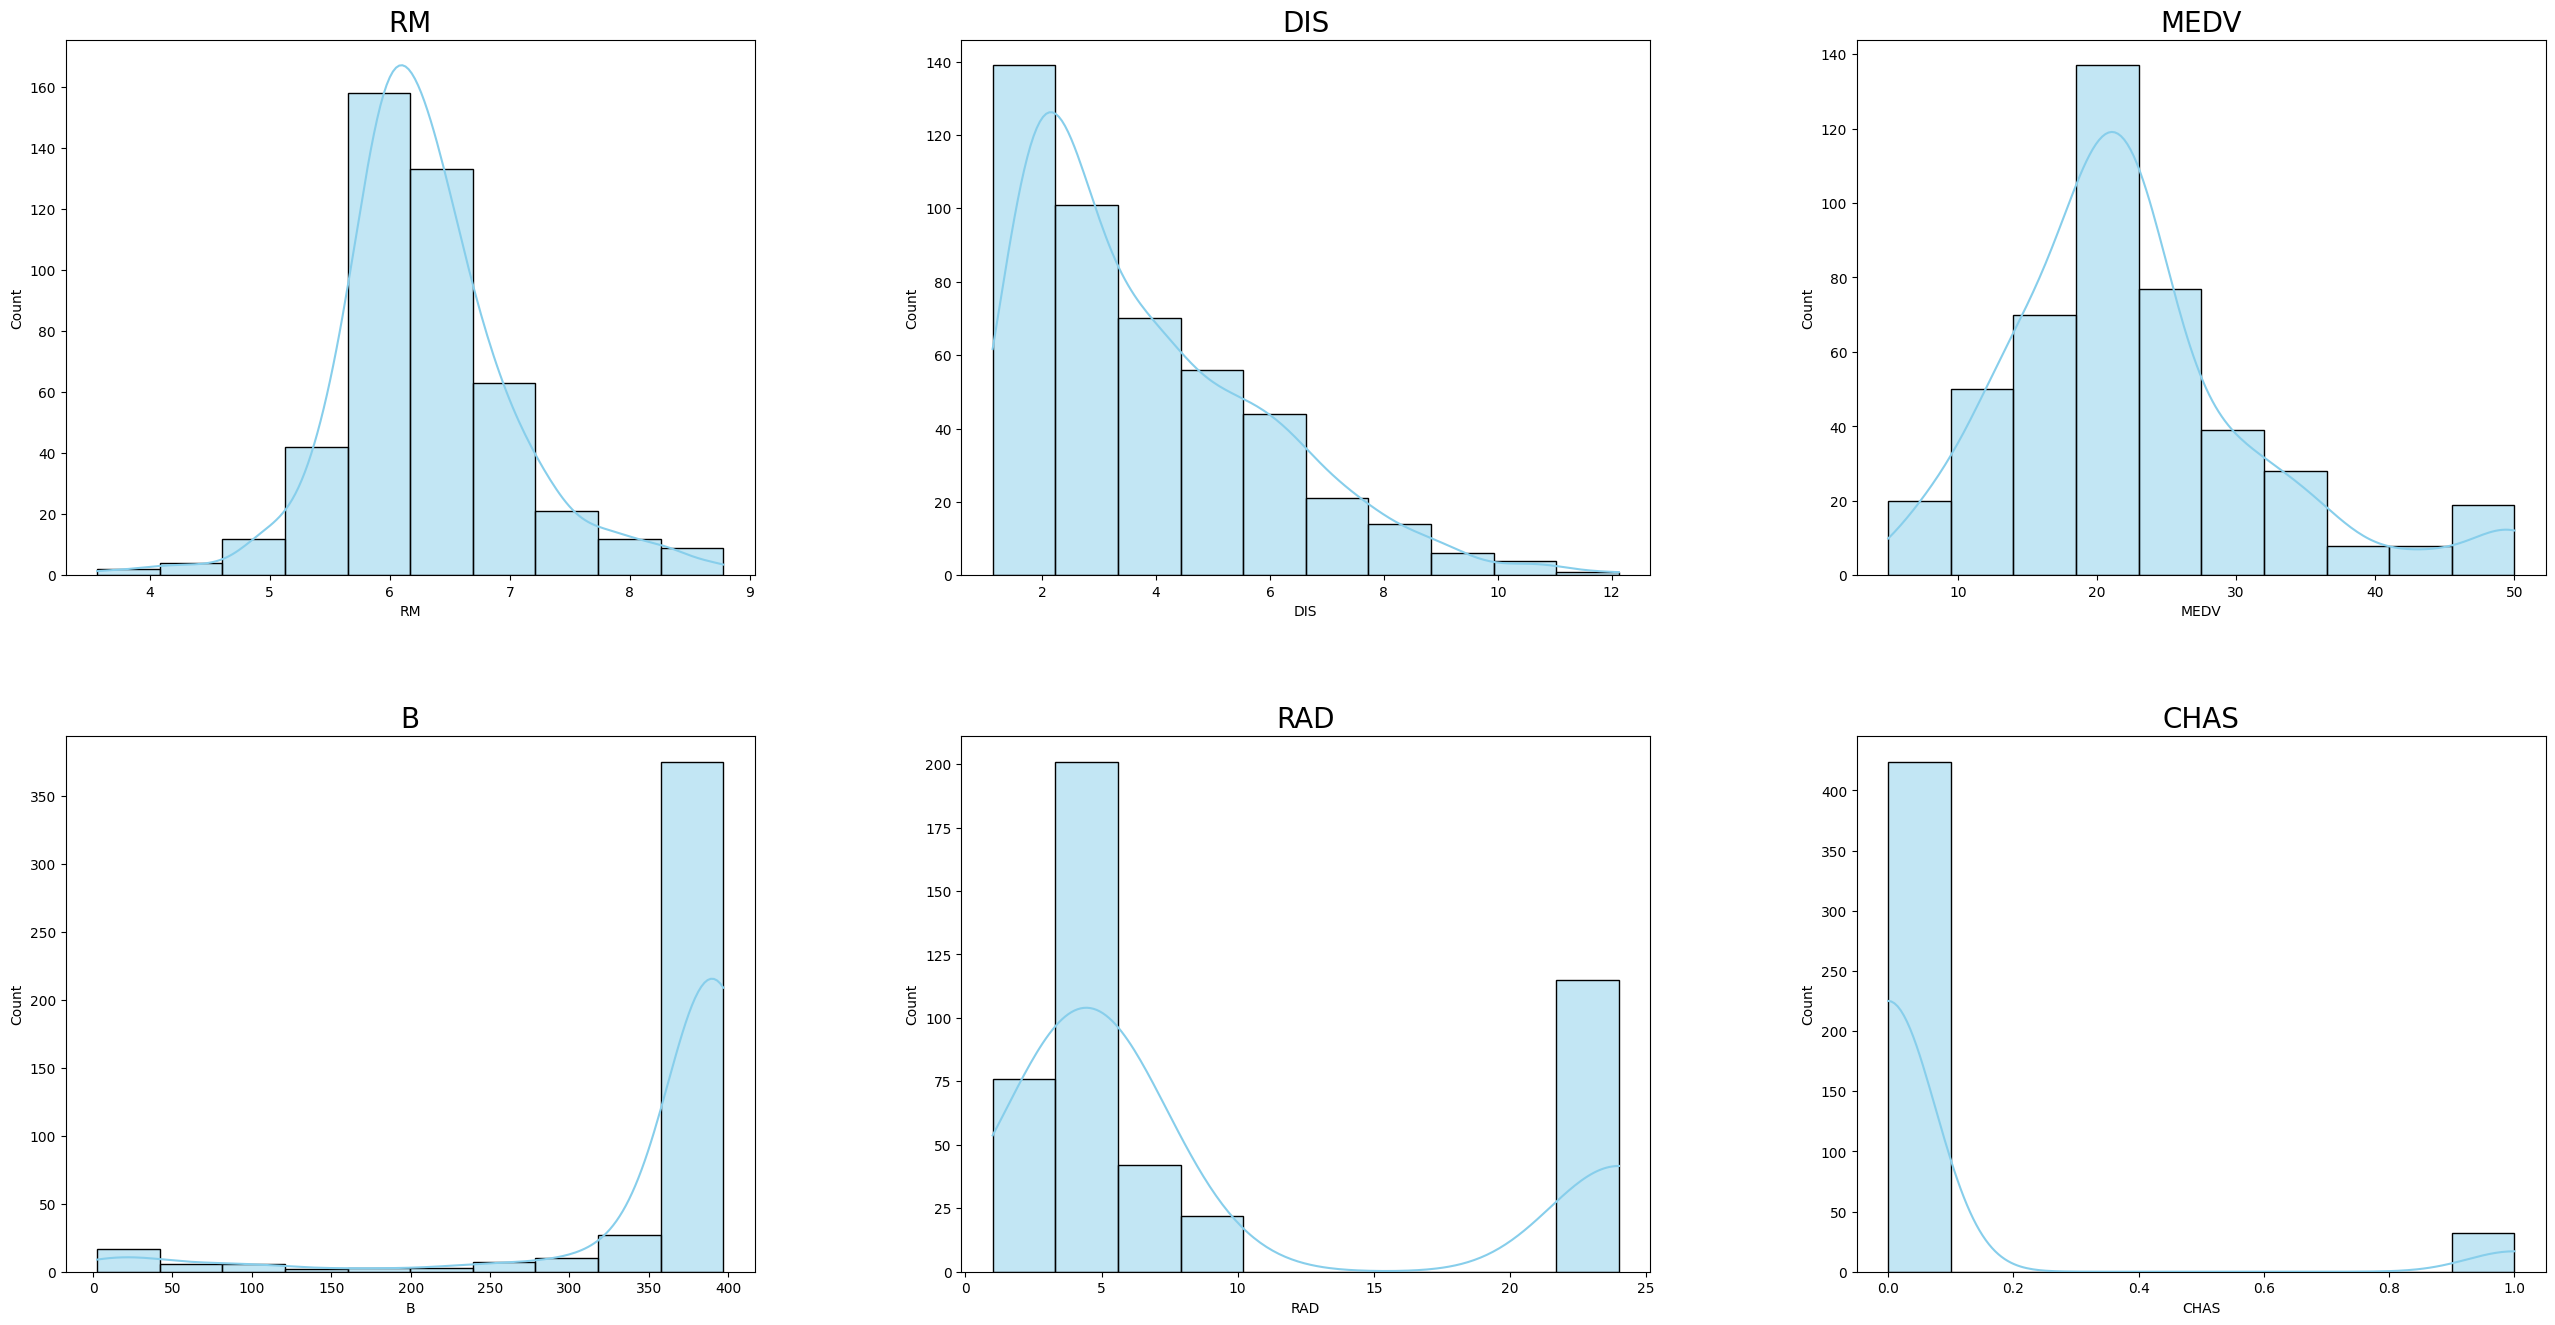

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
import pandas as pd

# 示例变量分组（可根据你的 df 实际列名修改）
ratio_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']
number_names = ['RM', 'DIS', 'MEDV']
index_names = ['B', 'RAD', 'CHAS']

def dis_plot(size: tuple, data: pd.DataFrame, name: list) -> None:
    """
    用来绘制分布图的函数
    size: 子图形状
    data: 数据
    name: 需要绘制的列名 columns
    """
    plt.figure(1, figsize=(32, 16)) # 设置图大小
    plt.subplots_adjust(hspace=0.3, wspace=0.3) # 子图间距
    
    for i, k in enumerate(name):
        plt.subplot(size[0], size[1], i + 1) #nrows × ncols 个格子，在第 index 个位置创建一个子图。
        plt.title(k, fontsize=20)
        sns.histplot(data[k], bins=10, kde=True,  color='skyblue') #kde=True 绘制核密度估计（平滑的曲线）
    
    plt.show()

# 示例：绘制 ratio 变量分布图
dis_plot((2, 4), df, ratio_names)

# 示例：绘制 number 和 index 变量分布图
dis_plot((2, 3), df, number_names + index_names)

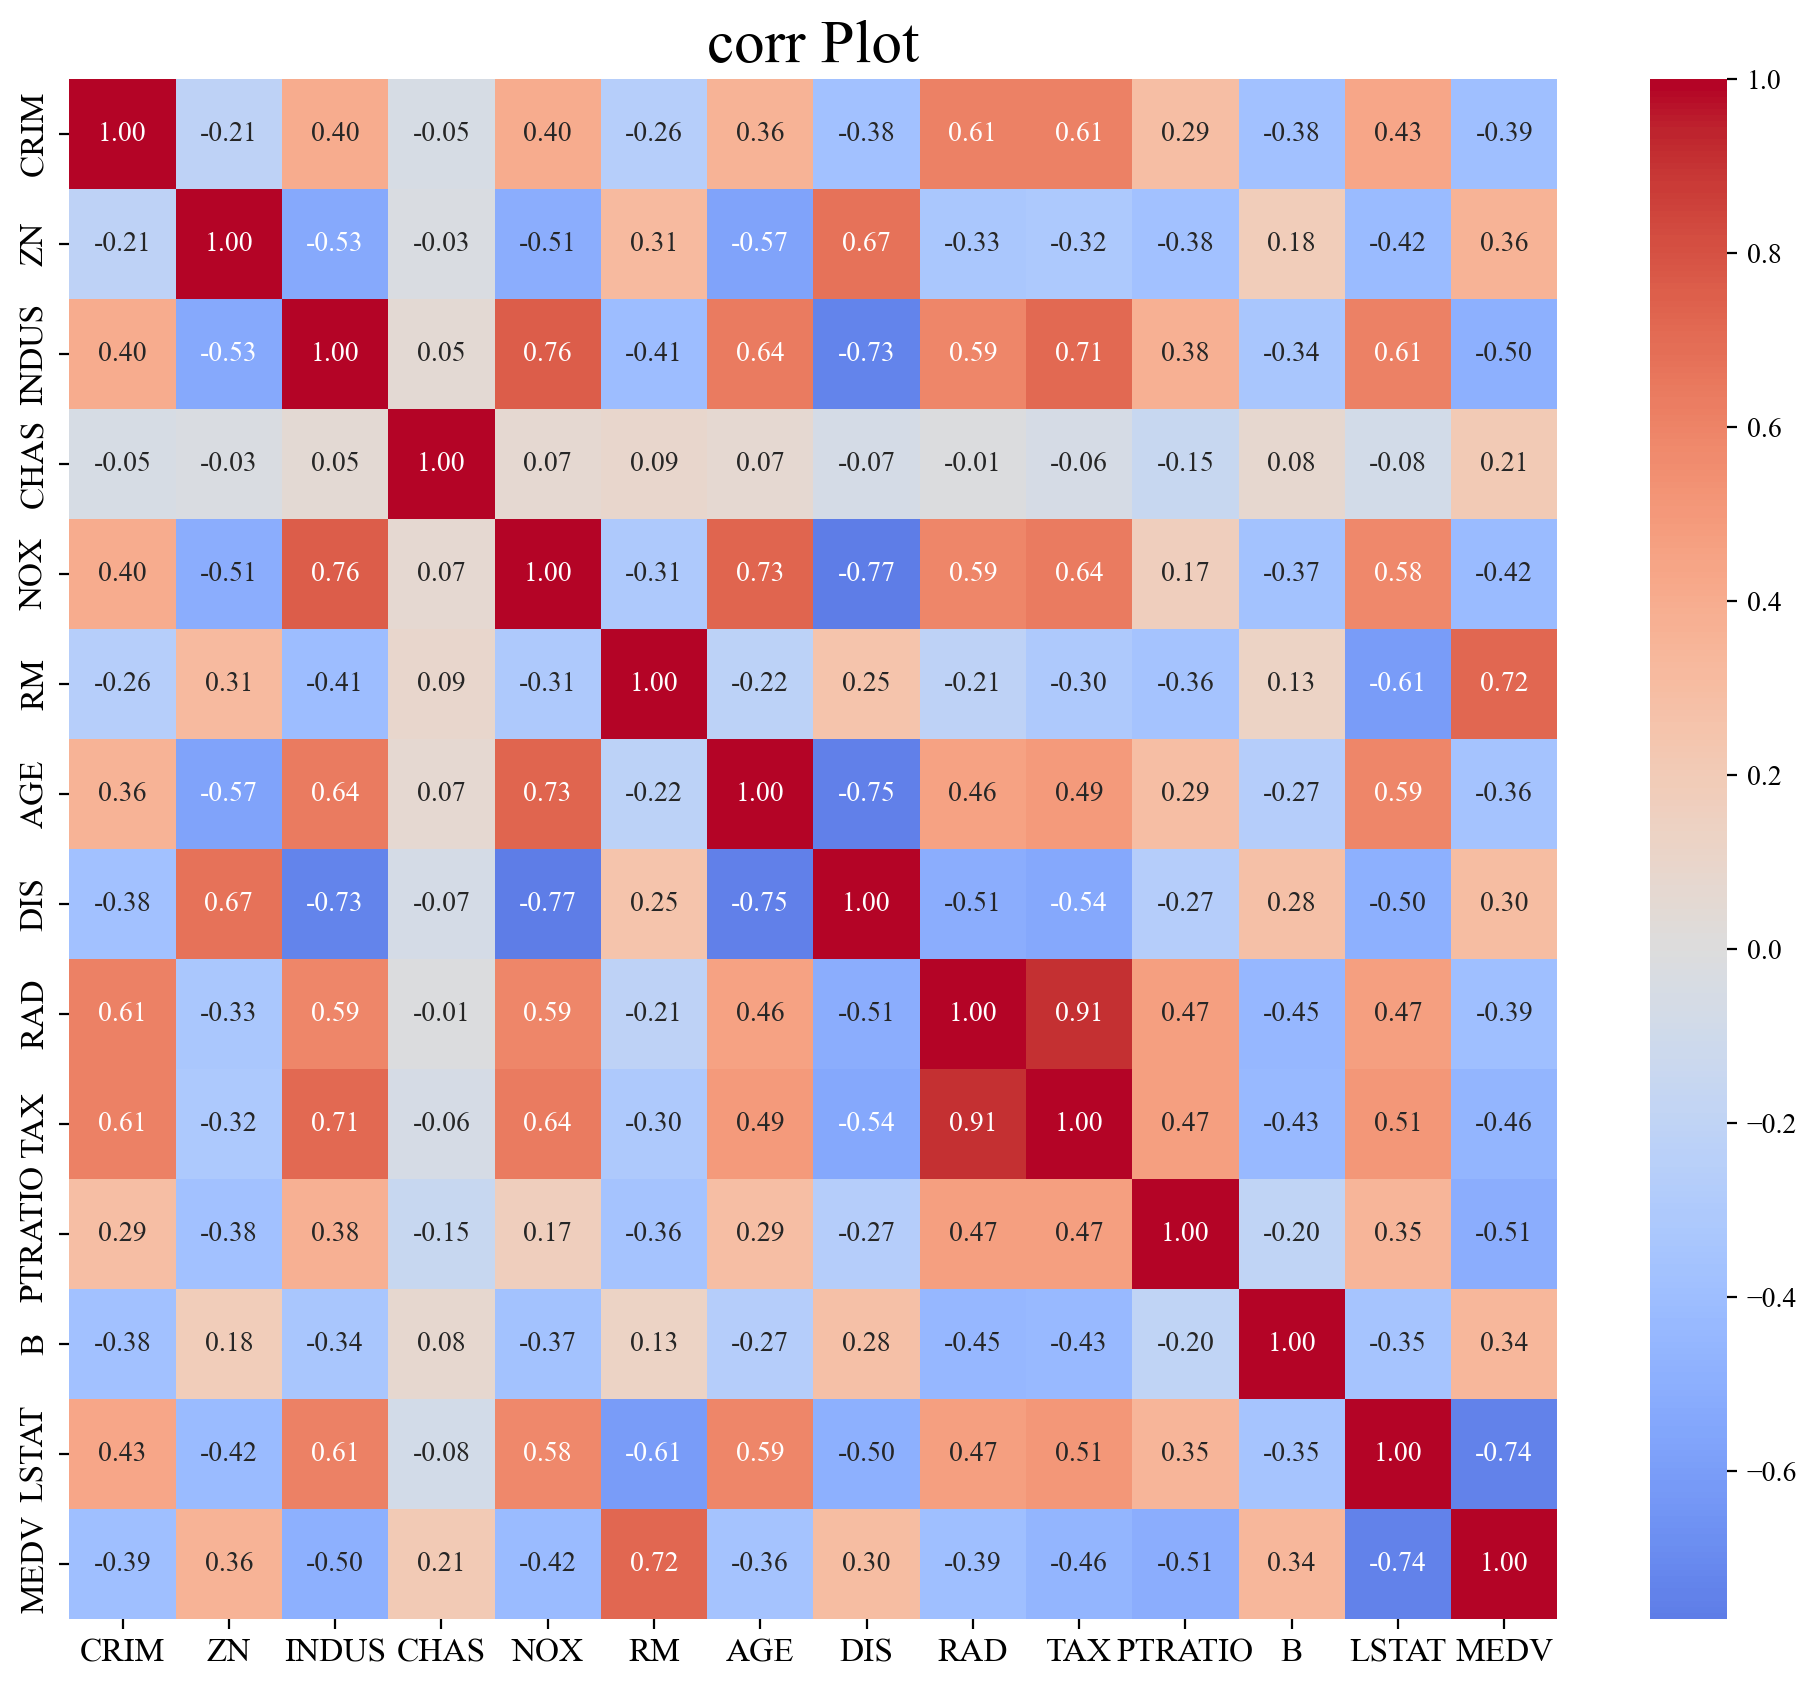

In [15]:
## 相关性检测
##  相关性检测作用：指导特征工程与特征选择：
# 1. 剔除与目标变量（如 MEDV）相关性极低的冗余特征，减少模型复杂度。
# 例如：若某特征与 MEDV 的相关系数接近 0，可考虑删除以提升模型效率。
# 2. 处理多重共线性：检测自变量之间的高相关性（如 \(|r|>0.8\)），避免线性回归模型中因共线性导致的参数估计不稳定。
# 例如：若 “房屋面积” 和 “房间数量” 高度相关，需合并或剔除其中一个。
# 3. 剔除与目标变量（如 MEDV）相关性极低的冗余特征，减少模型复杂度。

def heatmap_plot(title, df, co):
    # 设置全局字体为 Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'

    # 计算相关系数矩阵，保留两位小数
    corr = df.corr(method="pearson").round(2)

    plt.figure(figsize=(12, 10), dpi=200)

    sns.heatmap(
        corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap=co,
        center=0,
        annot=True,           # 显示数值
        fmt=".2f",            # 保留两位小数
        annot_kws={"size": 10}  # 数字字体大小
    )
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=22)
    plt.show()

heatmap_plot('corr Plot',df, 'coolwarm')

In [16]:
#数据分割：划分训练集与测试集（70% 训练，30% 测试）
from sklearn.model_selection import train_test_split

## 用列的均值填补缺失值
df = df.fillna(df.mean())
X = df.drop('MEDV', axis=1)  # 特征矩阵
y = df['MEDV']  # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # random_state固定随机种子，确保结果可复现

In [17]:
## 选择模型：简单线性回归（单变量）→ 多元线性回归（多变量）
from sklearn.linear_model import LinearRegression
model_single = LinearRegression()
rtn=model_single.fit(X_train[['RM']], y_train)  # 单特征训练


In [18]:
## MSE和R²
# MSE是均方误差，代表预测值与真实值之间的误差。MSE越小，模型越好，
# MSE = (1/n) * Σ(y_true - y_pred)^2

# R²是决定系数，决定系数越大，模型越好。
# R² = 1 - (Σ(y_true - y_pred)^2 / Σ(y_true - y_true.mean())^2)
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model_single.predict(X_test[['RM']])
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2=r2_score(y_test, y_pred)
print("R² :", r2)

MSE: 43.85661229971188
R² : 0.33824708525720315


In [21]:
model_multi = LinearRegression()
rtn=model_multi.fit(X_train, y_train)


In [22]:
y_pred = model_multi.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

r2=r2_score(y_test, y_pred)
print("R² :", r2)

MSE: 34.55839359603447
R² : 0.4785480115354268


In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

    results.append({
        'Model': name,
        'R²': round(r2, 4),
        'Adjusted R²': round(adj_r2, 4),
        'MSE': round(mse, 4)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Adjusted R²', ascending=False)
results_df

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Bayesian Ridge...
Training Decision Tree...
Training Random Forest...
Training SVR (RBF Kernel)...
Training Gradient Boosting...
Training XGBoost...


Model      R²  Adjusted R²      MSE
7  Gradient Boosting  0.7278       0.7022  18.0382
5      Random Forest  0.7104       0.6831  19.1942
8            XGBoost  0.6041       0.5668  26.2396
0  Linear Regression  0.4785       0.4294  34.5584
4      Decision Tree  0.4782       0.4291  34.5796
2   Lasso Regression  0.4777       0.4285  34.6120
3     Bayesian Ridge  0.4768       0.4275  34.6754
1   Ridge Regression  0.4767       0.4274  34.6796
6   SVR (RBF Kernel)  0.1839       0.1071  54.0830

In [34]:
## 分类问题，以Iris数据集为例子
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [54]:
iris_df = pd.read_csv("iris.csv")
print(iris_df.shape)
iris_df.head(5) # 查看前5行数据

(150, 6)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa


Iris数据集包含以下信息：
1. 样本数量：共150个样本，平均分为3个类别，每个类别各有50个样本。
2. 类别：
- Setosa（山鸢尾）
- Versicolor（杂色鸢尾）
- Virginica（维吉尼亚鸢尾）
3. 特征：
每个样本有4个特征，均为数值型：
- 花萼长度 (sepal length)，单位为厘米。
- 花萼宽度 (sepal width)，单位为厘米。
- 花瓣长度 (petal length)，单位为厘米。
- 花瓣宽度 (petal width)，单位为厘米。
4. 标签：
每个样本对应一个类别标签，分别为 0（Setosa）、1（Versicolor）、2（Virginica）。


In [57]:
# 查看数据基本信息
print("数据基本信息：")
print(iris_df.info())
print("\n数据统计信息：")
print(iris_df.describe())
print("\n类别分布：")
print(iris_df['target'].value_counts())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

数据统计信息：
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.00

In [73]:
# 加载鸢尾花数据集
X = iris_df.drop(['target','target_name'], axis=1)   # 特征
y = iris_df['target']  # 标签（类别）

# 打印数据集的基本信息
print("特征维度：", X.shape)
print("目标类别：", set(y))

# 分析并可视化一下这个数据的情况，

特征维度： (150, 4)
目标类别： {0, 1, 2}


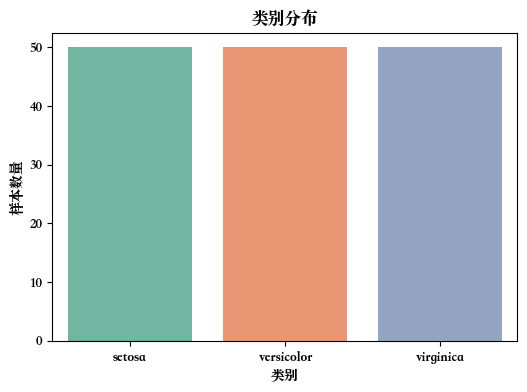

In [65]:
# 类别分布可视化
plt.rcParams['font.family'] = 'Songti SC'  # 设置中文字体
plt.figure(figsize=(6, 4), dpi=100)

sns.countplot(data=iris_df, x='target_name', hue='target', palette='Set2', legend=False) 

plt.title("类别分布")
plt.xlabel("类别")
plt.ylabel("样本数量")
plt.show()

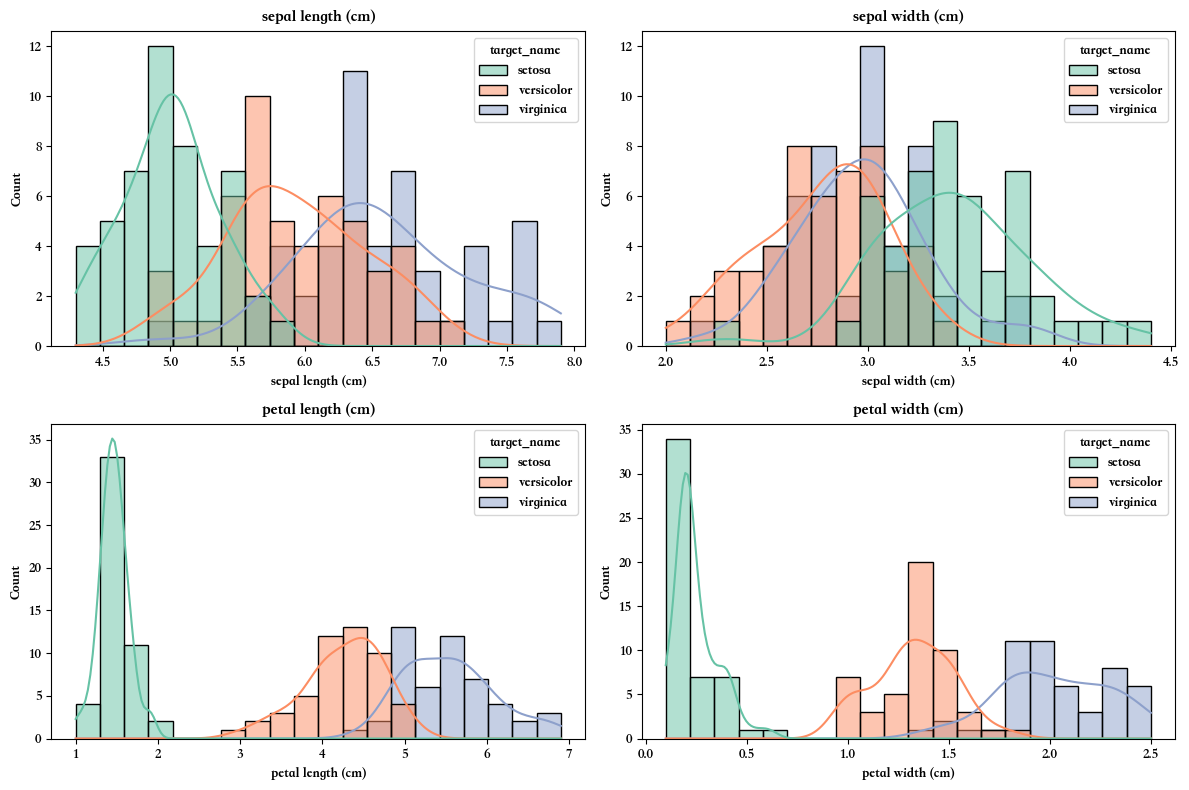

In [83]:
# 单个特征的分布情况（每个类别的直方图）
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='target_name', kde=True, palette='Set2', bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

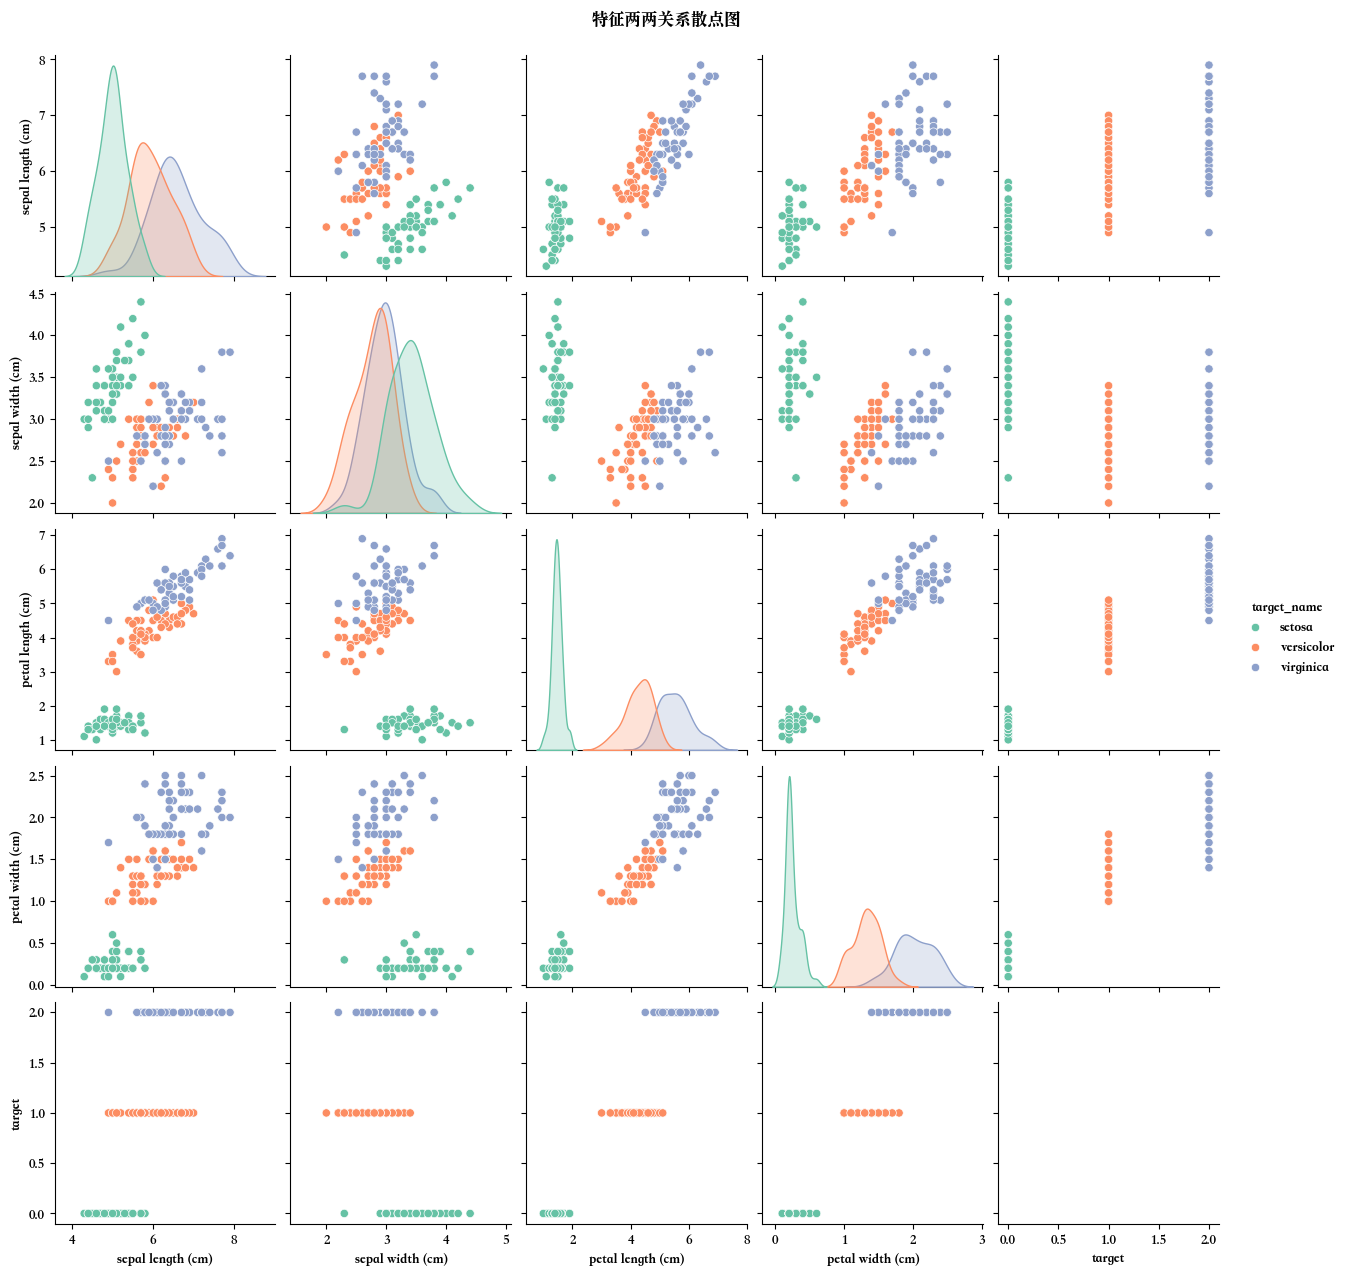

In [84]:
# 特征两两关系可视化（散点图矩阵）
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='target_name', palette='Set2', diag_kind='kde') #按照 target_name 分组并着色；diag_kind='kde' 对角线上绘制每个特征的 核密度估计图（KDE），用于显示单变量分布
plt.suptitle("特征两两关系散点图", y=1.02)
plt.show()


看两个特征之间的散点图，观察不同颜色的点是否聚集在不同区域。
可分性越强，模型越容易学到分类边界。
通过以上分析和可视化，我们可以得出以下结论：
1. 鸢尾花数据集中的 petal length 和 petal width 是区分不同类别的重要特征。
2. sepal length 和 sepal width 的区分能力较弱，可能需要结合其他特征来提高分类效果。
3. 数据整体分布均匀，没有明显的缺失值或异常情况。

In [85]:
# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("训练集大小：", X_train.shape[0])
print("测试集大小：", X_test.shape[0])

训练集大小： 120
测试集大小： 30


In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [90]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 多分类用 macro
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("模型评估指标：")
print(f"准确率 Accuracy:    {accuracy:.4f}")
print(f"精确率 Precision:  {precision:.4f}")
print(f"召回率 Recall:     {recall:.4f}")
print(f"F1 分数 F1-score:  {f1:.4f}")

模型评估指标：
准确率 Accuracy:    1.0000
精确率 Precision:  1.0000
召回率 Recall:     1.0000
F1 分数 F1-score:  1.0000


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


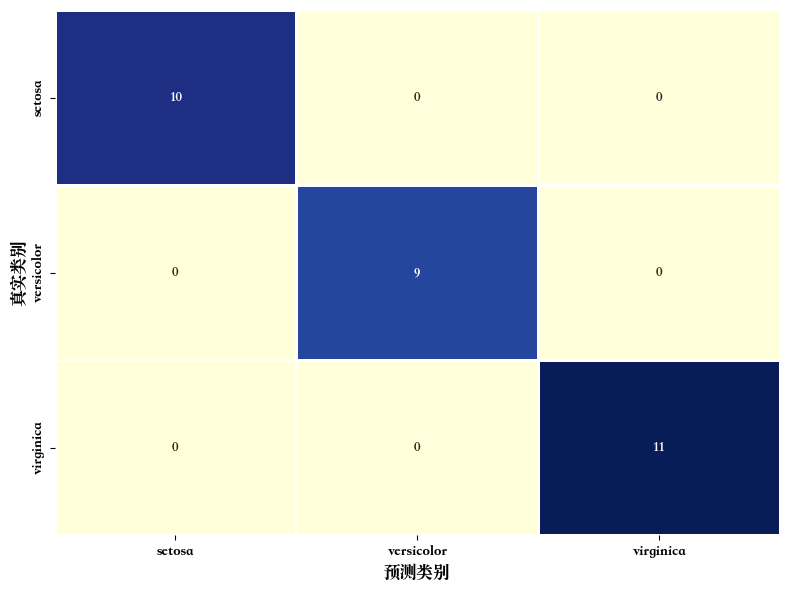

In [ ]:
target_names=['setosa', 'versicolor', 'virginica']
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,            # 显示数字
    fmt="d",               # 整数格式
    cmap="YlGnBu",         # 颜色风格
    linewidths=1,          # 网格线
    linecolor='white',     # 网格线颜色
    xticklabels=target_names,
    yticklabels=target_names,
    cbar=False             # 不显示右侧颜色条
)
plt.xlabel("预测类别", fontsize=12)
plt.ylabel("真实类别", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## 20 Newsgroups 数据集简介
- **任务类型**：文本多分类问题。
- **数据描述**：
  - 该数据集包含 20 个新闻组的文本数据，任务是根据新闻内容预测它所属的新闻组类别。
  - 数据集分为训练集和测试集，训练集有 11314 篇新闻，测试集有 7532 篇新闻。
- **复杂性**：
  - 文本数据需要进行预处理（如清洗、分词、向量化）。
  - 不同类别之间可能存在一定的相关性（如科技类和体育类新闻可能共享一些词汇）。

| 类别编号 | 类别英文名               | 中文解释               |
|----------|--------------------------|------------------------|
| 0        | alt.atheism              | 非宗教讨论／无神论     |
| 1        | comp.graphics            | 计算机图形             |
| 2        | comp.os.ms-windows.misc  | Windows 操作系统杂项   |
| 3        | comp.sys.ibm.pc.hardware| IBM PC 硬件            |
| 4        | comp.sys.mac.hardware    | Mac 硬件               |
| 5        | comp.windows.x           | X Window 系统          |
| 6        | misc.forsale             | 物品买卖／跳蚤市场     |
| 7        | rec.autos                | 汽车                   |
| 8        | rec.motorcycles          | 摩托车                 |
| 9        | rec.sport.baseball       | 棒球                   |
| 10       | rec.sport.hockey         | 冰球                   |
| 11       | sci.crypt                | 加密技术／密码学       |
| 12       | sci.electronics          | 电子学                 |
| 13       | sci.med                  | 医学                   |
| 14       | sci.space                | 太空科学／宇航         |
| 15       | soc.religion.christian   | 基督教                 |
| 16       | talk.politics.guns       | 枪支政治               |
| 17       | talk.politics.mideast    | 中东政治               |
| 18       | talk.politics.misc       | 政治杂谈               |
| 19       | talk.religion.misc       | 宗教杂谈               |

In [119]:
from sklearn.datasets import fetch_20newsgroups

# 加载 20 Newsgroups 数据集
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))  # 移除元信息
X, y = newsgroups.data, newsgroups.target

# 查看数据基本信息
print("数据集大小：", len(X))
print("类别数量：", len(set(y)))
print("类别名称：", newsgroups.target_names)
print("\n样本示例：\n", X[0])  # 打印第一条样本
print("\n对应类别：", newsgroups.target_names[y[0]])

数据集大小： 18846
类别数量： 20
类别名称： ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

样本示例：
 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to be

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 使用 TfidfVectorizer 将文本转化为 TF-IDF 特征向量
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=5)  # 停用词、过滤低频和高频词
X_tfidf = vectorizer.fit_transform(X)

# 打印特征矩阵的维度
print("TF-IDF 特征矩阵的维度：", X_tfidf.shape)


TF-IDF 特征矩阵的维度： (18846, 24164)


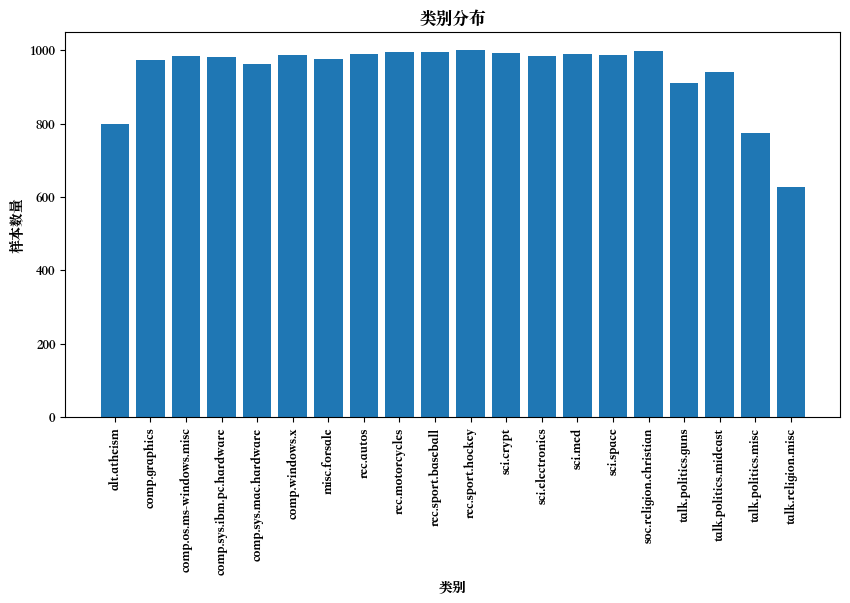

特征词数量： 24164
示例特征词： ['00' '000' '0000' '00000' '0001' '00072' '001' '0013' '002' '003']


In [121]:
import numpy as np
import matplotlib.pyplot as plt

# 类别分布
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, tick_label=newsgroups.target_names)
plt.xticks(rotation=90)
plt.title("类别分布")
plt.xlabel("类别")
plt.ylabel("样本数量")
plt.show()

# 打印高频词示例
print("特征词数量：", len(vectorizer.get_feature_names_out()))
print("示例特征词：", vectorizer.get_feature_names_out()[:10])


In [131]:

from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("训练集大小：", len(X_train))
print("测试集大小：", len(X_test))


训练集大小： 15076
测试集大小： 3770


In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=500,),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', n_estimators=500, max_depth=6, learning_rate=0.1, random_state=42)
    }


for name, model in models.items():
    print(f"\n>>> 正在训练模型：{name}")
    pipeline = make_pipeline(vectorizer, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"准确率: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))



>>> 正在训练模型：Decision Tree
准确率: 0.4634
                          precision    recall  f1-score   support

             alt.atheism       0.35      0.34      0.34       151
           comp.graphics       0.36      0.36      0.36       202
 comp.os.ms-windows.misc       0.43      0.43      0.43       195
comp.sys.ibm.pc.hardware       0.33      0.39      0.36       183
   comp.sys.mac.hardware       0.52      0.47      0.49       205
          comp.windows.x       0.67      0.53      0.60       215
            misc.forsale       0.55      0.51      0.53       193
               rec.autos       0.29      0.60      0.40       196
         rec.motorcycles       0.57      0.51      0.53       168
      rec.sport.baseball       0.55      0.53      0.54       211
        rec.sport.hockey       0.66      0.61      0.63       198
               sci.crypt       0.63      0.54      0.58       201
         sci.electronics       0.35      0.31      0.33       202
                 sci.med       0.54  

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 创建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print("测试集准确率：", accuracy)
print("\n分类报告：\n")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


测试集准确率： 0.7246684350132626

分类报告：

                          precision    recall  f1-score   support

             alt.atheism       0.70      0.40      0.51       151
           comp.graphics       0.67      0.69      0.68       202
 comp.os.ms-windows.misc       0.66      0.65      0.66       195
comp.sys.ibm.pc.hardware       0.56      0.76      0.64       183
   comp.sys.mac.hardware       0.85      0.68      0.75       205
          comp.windows.x       0.86      0.80      0.83       215
            misc.forsale       0.78      0.72      0.75       193
               rec.autos       0.83      0.78      0.80       196
         rec.motorcycles       0.48      0.78      0.60       168
      rec.sport.baseball       0.91      0.82      0.86       211
        rec.sport.hockey       0.90      0.90      0.90       198
               sci.crypt       0.75      0.82      0.78       201
         sci.electronics       0.81      0.64      0.71       202
                 sci.med       0.89     

**结果解读**
1. 准确率：
* 朴素贝叶斯分类器的准确率通常在 80%-90% 之间，具体结果会因参数和数据集的划分而变化。
2. 分类报告：
* precision（精确率）：分类为某类别的样本中有多少是真实属于该类别的。
* recall（召回率）：真实属于某类别的样本中有多少被正确分类。
* f1-score：精确率和召回率的调和平均值。